# Random Forest

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

mat_content = sio.loadmat('/content/drive/MyDrive/face.mat')

mat_content # Let's see the content...

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Sat May 27 02:07:24 2006',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[106, 130, 191, ...,  70, 183,  77],
        [103, 129, 185, ...,  62, 250,  72],
        [103, 130, 174, ...,  83, 163,  68],
        ...,
        [ 37,  40,  22, ...,  87, 102,  93],
        [ 36,  36,  19, ...,  89,  95, 103],
        [ 41,  35,  17, ...,  94, 106, 110]], dtype=uint8),
 'l': array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  2,
          2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
          4,  4,  4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,
          5,  5,  6,  6,  6,  6,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,
          7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
          9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10,
         10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12,
         12, 12, 12, 12, 12, 12, 12, 12, 13,

In [ ]:
face_data = mat_content['X']

print(face_data) # Each column represents one face image, each row a pixel value for a particular coordinate of the image
print(face_data.shape)

[[106 130 191 ...  70 183  77]
 [103 129 185 ...  62 250  72]
 [103 130 174 ...  83 163  68]
 ...
 [ 37  40  22 ...  87 102  93]
 [ 36  36  19 ...  89  95 103]
 [ 41  35  17 ...  94 106 110]]
(2576, 520)


In [ ]:
face_identity = mat_content['l']

print(face_identity)
print(face_identity.shape)

[[ 1  1  1  1  1  1  1  1  1  1  2  2  2  2  2  2  2  2  2  2  3  3  3  3
   3  3  3  3  3  3  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5
   5  5  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  8  8
   8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9 10 10 10 10 10 10
  10 10 10 10 11 11 11 11 11 11 11 11 11 11 12 12 12 12 12 12 12 12 12 12
  13 13 13 13 13 13 13 13 13 13 14 14 14 14 14 14 14 14 14 14 15 15 15 15
  15 15 15 15 15 15 16 16 16 16 16 16 16 16 16 16 17 17 17 17 17 17 17 17
  17 17 18 18 18 18 18 18 18 18 18 18 19 19 19 19 19 19 19 19 19 19 20 20
  20 20 20 20 20 20 20 20 21 21 21 21 21 21 21 21 21 21 22 22 22 22 22 22
  22 22 22 22 23 23 23 23 23 23 23 23 23 23 24 24 24 24 24 24 24 24 24 24
  25 25 25 25 25 25 25 25 25 25 26 26 26 26 26 26 26 26 26 26 27 27 27 27
  27 27 27 27 27 27 28 28 28 28 28 28 28 28 28 28 29 29 29 29 29 29 29 29
  29 29 30 30 30 30 30 30 30 30 30 30 31 31 31 31 31 31 31 31 31 31 32 32
  32 32 32 32 32 32 32 32 33 33 33 33 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(face_data.T, face_identity.T, test_size=0.2, random_state=42)

print(X_train.shape)

(416, 2576)


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 62.50%


Now we can vary some input values for RF classifier.

In [ ]:
import time

# Define lists of values for the parameters you want to vary
n_estimators_values = range(20, 220, 20) # Vary the number of trees
max_depth_values = range(10, 110, 10)  # Vary the maximum depth of trees
accuracy_results = []
time_results = []

# Loop through the parameter combinations and train/test RF models
for n_estimators in n_estimators_values:
    for max_depth in max_depth_values:
        # Create a Random Forest Classifier with the current parameter values
        rf_classifier = RandomForestClassifier(
            n_estimators=n_estimators,
            max_depth=max_depth,
            random_state=42,
        )

        start = time.time()

        # Train the classifier on the training data
        rf_classifier.fit(X_train, y_train.ravel())

        end = time.time()

        # Make predictions on the test data
        y_pred = rf_classifier.predict(X_test)

        # Calculate the accuracy of the model
        accuracy = accuracy_score(y_test, y_pred)

        print(f"n_estimators={n_estimators}, max_depth={max_depth}")
        print(f"Accuracy: {accuracy * 100:.2f}%")

        accuracy_results.append(accuracy)
        time_results.append(end-start)

n_estimators=20, max_depth=10
Accuracy: 50.00%
n_estimators=20, max_depth=20
Accuracy: 54.81%
n_estimators=20, max_depth=30
Accuracy: 50.96%
n_estimators=20, max_depth=40
Accuracy: 52.88%
n_estimators=20, max_depth=50
Accuracy: 52.88%
n_estimators=20, max_depth=60
Accuracy: 52.88%
n_estimators=20, max_depth=70
Accuracy: 52.88%
n_estimators=20, max_depth=80
Accuracy: 52.88%
n_estimators=20, max_depth=90
Accuracy: 52.88%
n_estimators=20, max_depth=100
Accuracy: 52.88%
n_estimators=40, max_depth=10
Accuracy: 48.08%
n_estimators=40, max_depth=20
Accuracy: 65.38%
n_estimators=40, max_depth=30
Accuracy: 62.50%
n_estimators=40, max_depth=40
Accuracy: 59.62%
n_estimators=40, max_depth=50
Accuracy: 60.58%
n_estimators=40, max_depth=60
Accuracy: 60.58%
n_estimators=40, max_depth=70
Accuracy: 60.58%
n_estimators=40, max_depth=80
Accuracy: 60.58%
n_estimators=40, max_depth=90
Accuracy: 60.58%
n_estimators=40, max_depth=100
Accuracy: 60.58%
n_estimators=60, max_depth=10
Accuracy: 57.69%
n_estimator

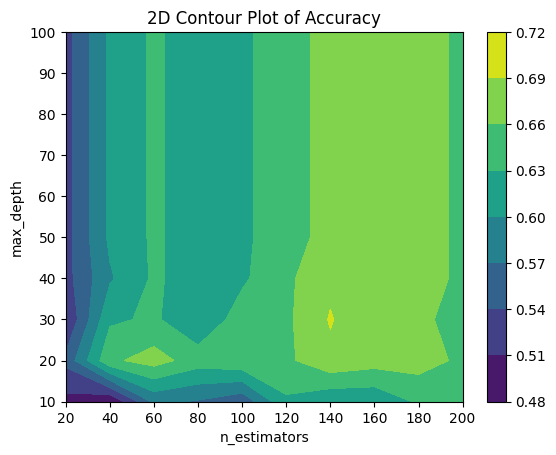

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of (K, D) values
K_grid, D_grid = np.meshgrid(n_estimators_values, max_depth_values)

# Create a 2D array of A values corresponding to (K, D) pairs
A_grid = np.array(accuracy_results).reshape(K_grid.shape).T

# Create a contour plot
plt.contourf(K_grid, D_grid, A_grid, cmap='viridis')
plt.colorbar()
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.title('2D Contour Plot of Accuracy')

plt.show()

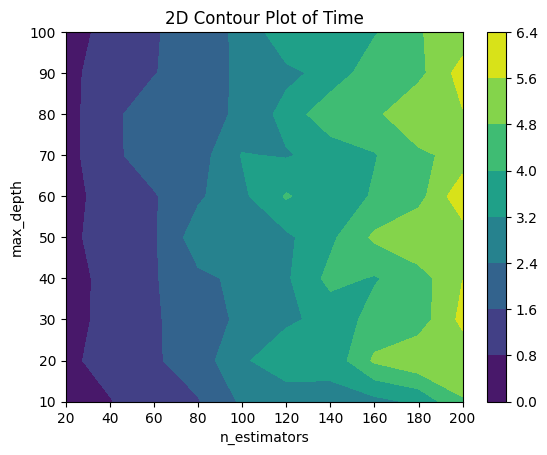

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create a grid of (K, D) values
K_grid, D_grid = np.meshgrid(n_estimators_values, max_depth_values)

# Create a 2D array of A values corresponding to (K, D) pairs
A_grid = np.array(time_results).reshape(K_grid.shape).T

# Create a contour plot
plt.contourf(K_grid, D_grid, A_grid, cmap='viridis')
plt.colorbar()
plt.xlabel('n_estimators')
plt.ylabel('max_depth')
plt.title('2D Contour Plot of Time')

plt.show()

In [ ]:
# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=140, max_depth=30, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train.ravel())

RandomForestClassifier(max_depth=30, n_estimators=140, random_state=42)

In [ ]:
# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 69.23%


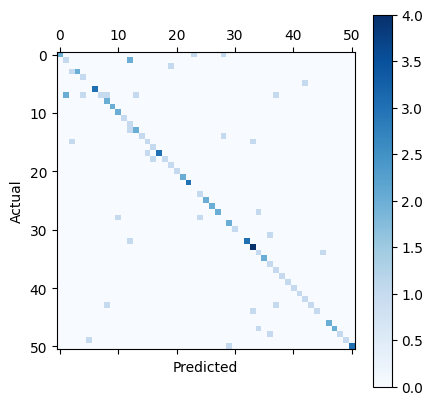

In [ ]:
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

cfn_matrix = confusion_matrix(y_test, y_pred)

plt.matshow(cfn_matrix, cmap = 'Blues')

plt.colorbar()
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

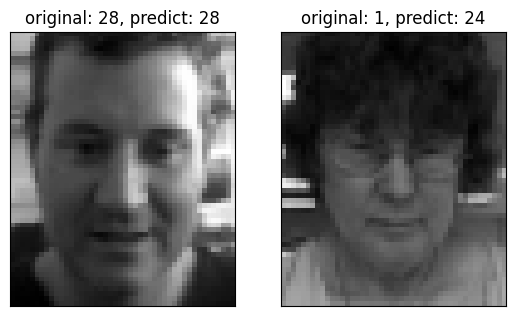

In [ ]:
# find success case
for index in range(len(y_pred)):
  if y_test[index] == y_pred[index]:
    original_image = X_test[index]
    original_face = np.reshape(original_image,(46,56)).T

    plt.subplot(121),plt.imshow(original_face, cmap = 'gist_gray')
    plt.title('original: %d, predict: %d' % (y_test[index], y_pred[index])), plt.xticks([]), plt.yticks([])
    break

# find failure case
for index in range(len(y_pred)):
  if y_test[index] != y_pred[index]:
    original_image = X_test[index]
    original_face = np.reshape(original_image,(46,56)).T

    plt.subplot(122),plt.imshow(original_face, cmap = 'gist_gray')
    plt.title('original: %d, predict: %d' % (y_test[index], y_pred[index])), plt.xticks([]), plt.yticks([])
    break

plt.show()